# Project 1: Amazon fine food reviews 

**Dataset:**

We are given a dataset consisting of reviews of fine foods from amazon. The data span a period of more than 10 years, including all ~500,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plain text review. It also includes reviews from all other Amazon categories.

**Project objectives:**

In this project, we will conduct sentiment analysis on the text data given by the Amazon food reviews. The proejct goal is to extract sentiment from product reviews. Specifically, we aim to predict customer response (postivie or negative) based on text reivews. 


**Methods:**
In this project, we 

1. perform explorative data analysis to investigate trends and patterns in the data via descriptive statistics and data visulization
2. preform data preprocessing/feature engineering on text data 
3. build machine learning models (logistic regression and random forest) models to make predictions and analyze feature importance

**Kaggle link:** https://www.kaggle.com/snap/amazon-fine-food-reviews

**Acknowledgement:** J. McAuley and J. Leskovec. From amateurs to connoisseurs: modeling the evolution of user expertise through online reviews. WWW, 2013.

# Project 1: Amazon food reviews 


In this section, we perform explorative data analysis and try to capture patterns and trends in data via statistical analysis and data visualization.

**Kaggle link:** https://www.kaggle.com/snap/amazon-fine-food-reviews

## Explorative data analysis

### Basic information about the data 


In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import seaborn as sns
import time 

sns.set_theme()
Fontsize=15

The dataset include the following features:
1. Id: unique user id 
2. Product id
3. ProfileName: names of the user profiles 
4. HelpfulnessNumerator and HelpfulnessDenominator: Product's helpfulness rate =  HelpfulnessNumerator/ HelpfulnessDenominator
5. Score: product score given by users 
6. Summary: summaries of product reviews 
7. Text: product reviews 

In [2]:
df = pd.read_csv('Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
df.info()

In [ ]:
print(f"The shape of the dataset is {df.shape}.\n")
print(f"The features include: {df.columns}.\n")

In [13]:
df.nunique()

Id                        568454
ProductId                  74258
UserId                    256059
ProfileName               218416
HelpfulnessNumerator         231
HelpfulnessDenominator       234
Score                          5
Time                        3168
Summary                   295742
Text                      393579
dtype: int64

Here we define an additional column for the helpfulness ratio. 

In [43]:
df['Helpfulness'] = df['HelpfulnessNumerator']/df['HelpfulnessDenominator']

The average score is 4.18/5 and the average helpfulness ratio is 0.78/1. This means the product reviews are overall positive.

In [22]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Helpfulness
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05,298402.000000
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09,0.776975
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07,0.346321
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08,0.000000
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09,0.600000
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09,1.000000
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09,1.000000
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09,3.000000


### Data cleaning 
1. Remove duplicate data 

In [44]:
print(df.shape)
df=df.drop_duplicates(subset=['UserId','ProfileName','Time','Summary'],keep='first')
print(df.shape)

(568454, 11)
(392908, 11)


2. Remove rows where the HelpfulnessDenominator is larger than the HelpfulnessNumerator.

In [45]:
print(df.shape)
df = df[df['HelpfulnessNumerator'] <= df['HelpfulnessDenominator']]
print(df.shape)

(392908, 11)
(392906, 11)


3. Check there there is missing data

Note that for some reviews the helpfulness numerator and denominator are both zero - in this case the helpfulness ratio is undefined. We do not remove the undefined data if the a score is provided for the review. 

In [93]:
df[df.columns[:-1]].isna().any()

Id                        False
ProductId                 False
UserId                    False
ProfileName                True
HelpfulnessNumerator      False
HelpfulnessDenominator    False
Score                     False
Time                      False
Summary                    True
Text                      False
dtype: bool

In [94]:
print(df.shape)
df = df.drop(df[df['ProfileName'].isna()==True].index.tolist(),axis=0)
print(df2.shape)

(392906, 11)
(392895, 11)


### Understanding the variables

**1. Score and helpfulness distributions**

The score and helpfulness distributions are similar - most of the reviews are very positive, and there is more slightly negative reviews than neutral reviews. This could be due to the common online review bias that customers only give feedbacks when their experiences are postive or negative, and usually do not put in the effects to submit reviews when their experience is neutral. 

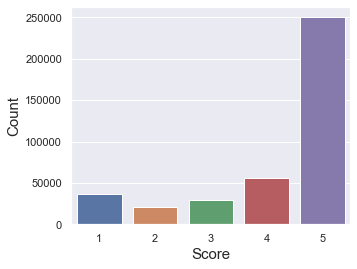

In [104]:
fig, ax = plt.subplots(figsize=(5,4))
sns.countplot(x=df['Score'],ax=ax)
ax.set_xlabel('Score',fontsize=Fontsize)
ax.set_ylabel('Count',fontsize=Fontsize)
plt.show()

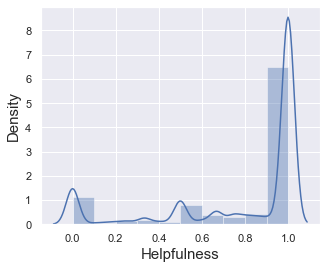

In [120]:
fig, ax = plt.subplots(figsize=(5,4))
sns.distplot(x=df[df['Helpfulness'].notnull()]['Helpfulness'],bins=10,ax=ax)
ax.set_xlabel('Helpfulness',fontsize=Fontsize)
ax.set_ylabel('Density',fontsize=Fontsize)
plt.show()

**2. How do products review change over the years?**

The average number of reviews submitted each day maintained low until around 2006. From 2006 to 2012, customers were more willing to give feedbacks on products they purchased. 

In [121]:
df['Date']  = pd.to_datetime(df['Time'],unit='s')

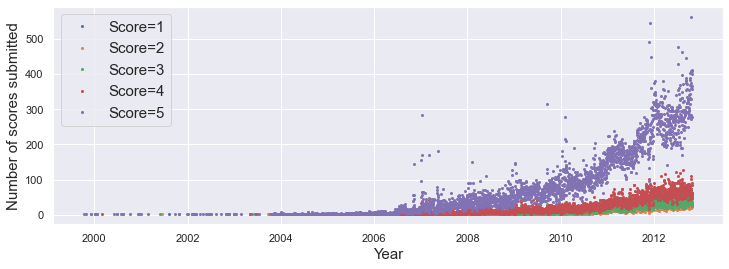

In [124]:
fig,ax = plt.subplots(figsize=(12,4))

for score in range(1,6):
    date_temp=df[df['Score']==score ].groupby('Date')['Score'].count()
    ax.plot_date(x=date_temp.index,y=date_temp,markersize=2,label='Score='+str(score))
ax.set_xlabel('Year',fontsize=Fontsize)
ax.set_ylabel('Number of scores submitted',fontsize=Fontsize)
ax.legend(fontsize=Fontsize)
plt.show()

Here we show the average word count of reveiws submitted each day over the years. Before 2017 there were data points with average word counts > 150, and after 2017, almost all average word counts are below 150. This implies customers started to prefer leaving shorter reviews in more recent years.

In [212]:
df['Text_len']  = df['Text'].apply(lambda text: len(text.split()))
text_temp=df.groupby('Date')['Text_len'].mean()

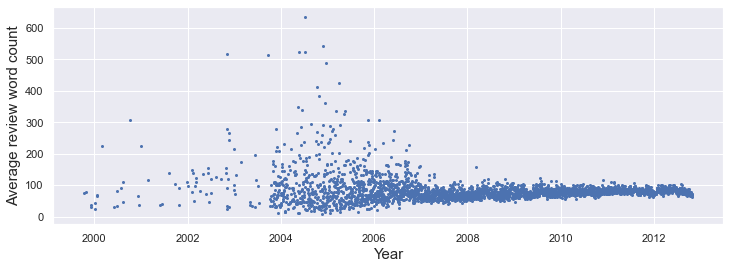

In [194]:
fig,ax = plt.subplots(figsize=(12,4))

ax.plot_date(x=text_temp.index,y=text_temp,markersize=2)
ax.set_xlabel('Year',fontsize=Fontsize)
ax.set_ylabel('Average review word count',fontsize=Fontsize)
plt.show()

The average product helpfulness and scores are plotted againt time. The figures show that customers are less likely to leave very negative feedbacks and more likely to leave neutral or positive feedbacks in more recent years.

In [181]:
df_help=df[df['Helpfulness'].notnull()]
help_temp=df_help.groupby('Date')['Helpfulness'].mean()

score_temp =df.groupby('Date')['Score'].mean()

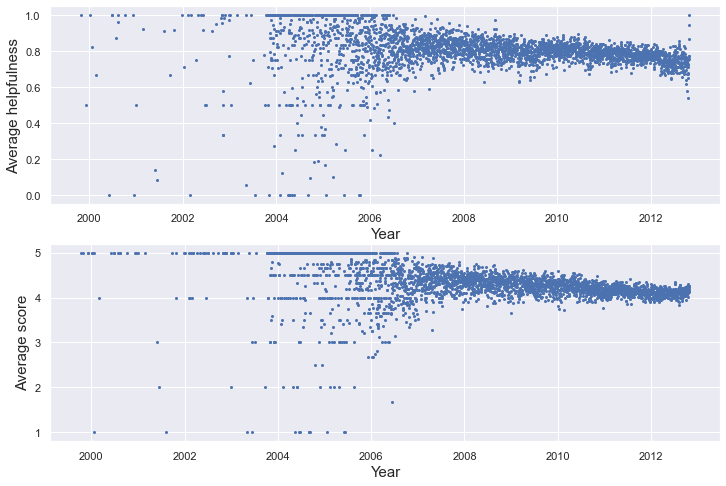

In [182]:
fig,axes = plt.subplots(2,1,figsize=(12,8))
axes[0].plot_date(x=help_temp.index,y=help_temp,markersize=2)
axes[0].set_xlabel('Year',fontsize=Fontsize)
axes[0].set_ylabel('Average helpfulness',fontsize=Fontsize)


axes[1].plot_date(x=score_temp.index,y=score_temp,markersize=2)
axes[1].set_xlabel('Year',fontsize=Fontsize)
axes[1].set_ylabel('Average score',fontsize=Fontsize)
plt.show()


**3. How are variables correlated to each other?**



We computed the correlation matrix for the variables helpfulness, score and text length (review word count). It appears that helpfulness is positively associated with product score, and the text length's correlations with helpfulness and score are very small. 

In [225]:
corr = df_help[['Helpfulness','Score','Text_len']].corr()
print(corr)

             Helpfulness     Score  Text_len
Helpfulness     1.000000  0.368827  0.041663
Score           0.368827  1.000000 -0.028657
Text_len        0.041663 -0.028657  1.000000


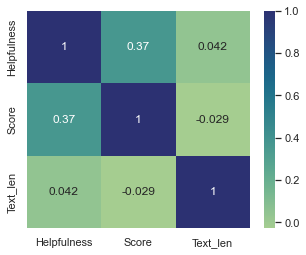

In [226]:
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,cmap='crest',ax=ax)
plt.show()